<a href="https://colab.research.google.com/github/salehghulamqasim/Mini-Project-BigMart-Sales-Predictive-Analysis/blob/main/BigMart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Here a flower for the best Data analyst i have ever known :👉🏻 🌹







In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
'''
from google.colab import files
uploaded = files.upload()
'''

'\nfrom google.colab import files\nuploaded = files.upload()\n'

# Loading Packages and Data

In [65]:
#Importing libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [7]:
train = pd.read_csv("/content/drive/My Drive/BigMart_dataset/Train.csv") 
test = pd.read_csv("/content/drive/My Drive/BigMart_dataset/Test.csv")

# Data Structure and Content

In [8]:
#printing first 5 rows of dataset just to see what is the dataset about
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
#checking summary of numerical columns 
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
print(train[["Outlet_Size","Item_Outlet_Sales"]])
#======

     Outlet_Size  Item_Outlet_Sales
0         Medium          3735.1380
1         Medium           443.4228
2         Medium          2097.2700
3            NaN           732.3800
4           High           994.7052
...          ...                ...
8518        High          2778.3834
8519         NaN           549.2850
8520       Small          1193.1136
8521      Medium          1845.5976
8522       Small           765.6700

[8523 rows x 2 columns]


In [12]:
print(test[["Item_Type","Outlet_Establishment_Year"]])
#======

               Item_Type  Outlet_Establishment_Year
0            Snack Foods                       1999
1                  Dairy                       2007
2                 Others                       1998
3            Snack Foods                       2007
4                  Dairy                       1985
...                  ...                        ...
5676         Snack Foods                       1997
5677       Starchy Foods                       2009
5678  Health and Hygiene                       2002
5679              Canned                       2007
5680              Canned                       2002

[5681 rows x 2 columns]


Sales per location

In [13]:
#number of rows and columns
train.shape

(8523, 12)

so we have in train dataset 8523 rows and 12 columns

In [14]:
#checking unique values of all columns.
train.apply(lambda x: x.unique())


Item_Identifier              [FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...
Item_Weight                  [9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n...
Item_Fat_Content                          [Low Fat, Regular, low fat, LF, reg]
Item_Visibility              [0.016047301, 0.019278216, 0.016760075, 0.0, 0...
Item_Type                    [Dairy, Soft Drinks, Meat, Fruits and Vegetabl...
Item_MRP                     [249.8092, 48.2692, 141.618, 182.095, 53.8614,...
Outlet_Identifier            [OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...
Outlet_Establishment_Year    [1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...
Outlet_Size                                         [Medium, nan, High, Small]
Outlet_Location_Type                                  [Tier 1, Tier 3, Tier 2]
Outlet_Type                  [Supermarket Type1, Supermarket Type2, Grocery...
Item_Outlet_Sales            [3735.138, 443.4228, 2097.27, 732.38, 994.7052...
dtype: object

In [15]:
train.apply(lambda x: x.value_counts()) 
#======

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0.0,NaN,NaN,NaN,526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.003574698,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.003589104,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.003597678,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.003599378,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Tier 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2388.0,NaN,NaN
Tier 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2785.0,NaN,NaN
Tier 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3350.0,NaN,NaN
low fat,NaN,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can see that we got 2410 null values in outlet size and 1463 in item_weight


### *Correlations* 


In [16]:
# find the correlation
myCor=train.corr()
myCor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Most strongest relationships are with Item outlet sales and Item_mrp

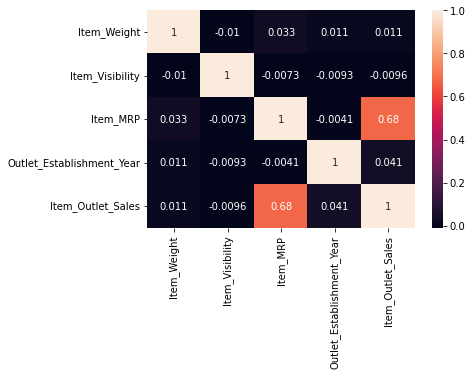

In [98]:
sns.heatmap(train.corr(), annot=True)


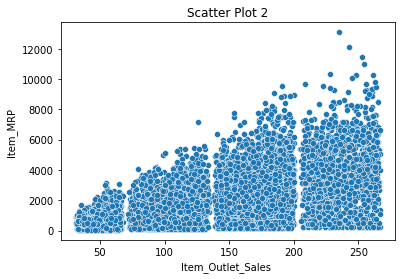

'\nMaximum Retail Price affects our product sales\n'

In [18]:
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", data=train)
plt.title("Scatter Plot 2")
plt.xlabel("Item_Outlet_Sales ")
plt.ylabel("Item_MRP ")
plt.show()

'''
Maximum Retail Price affects our product sales
'''


This graph tells us how Item_mrp influences Item_outlet_size

#Data cleansing


In [19]:
#let us check nulls value for train set
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**as we can see we have Null values**

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


i choose to drop the null values since we already have 8k+ rows

In [21]:
# drop missing values
train = train.dropna()


In [22]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**But now since we dropped all of them. It shows zero null values ;)**

In [23]:
# Check for duplicates
duplicates = train.duplicated()
print(duplicates.sum())

0


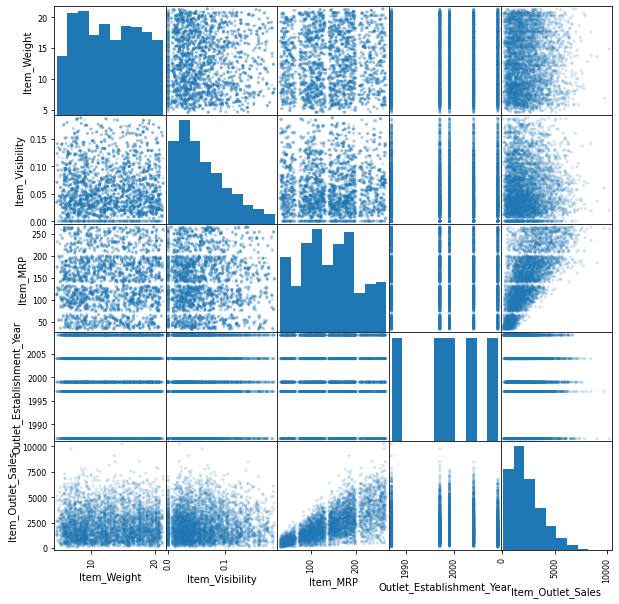

In [24]:
scatter_matrix(train, alpha=0.2, figsize=(10, 10), diagonal='hist')
plt.show()

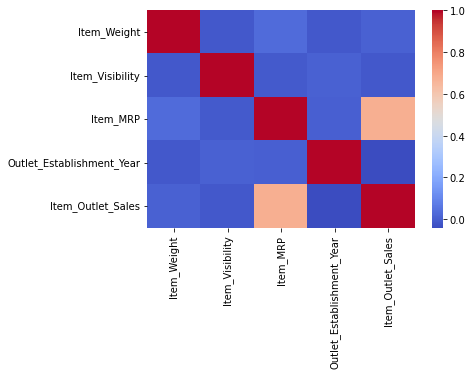

In [25]:
sns.heatmap(train.corr(), cmap='coolwarm')
plt.show()

#Exploratory Data Analysis
##Univariate

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


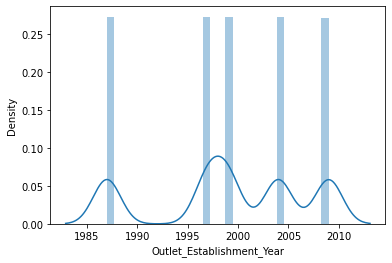

In [26]:
sns.distplot(train['Outlet_Establishment_Year'],bins=30)
#The distplot can give you a sense of the spread and shape of the data
#======

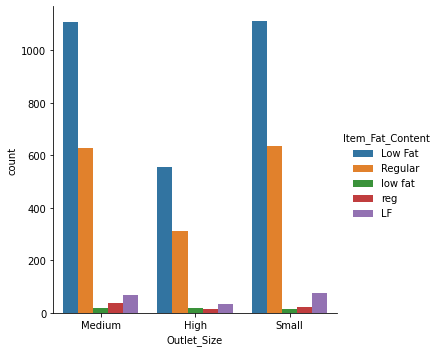

In [27]:
sns.catplot(x='Outlet_Size',hue='Item_Fat_Content',data=train,kind='count')
#====

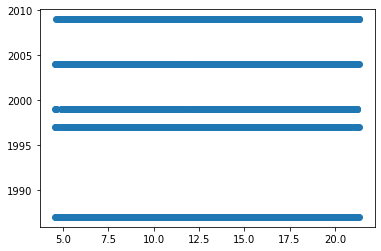

In [28]:
plt.scatter(train.Item_Weight,train['Outlet_Establishment_Year'])
plt.show()

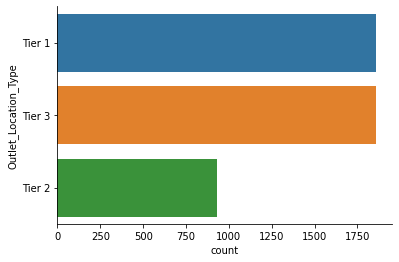

In [29]:
sns.countplot(y="Outlet_Location_Type", data = train)
sns.despine()

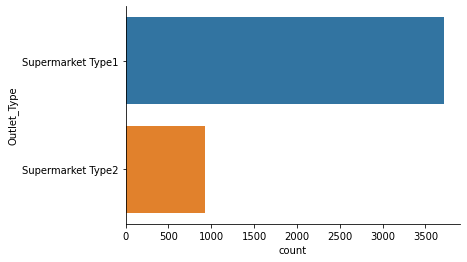

In [30]:
sns.countplot(y="Outlet_Type", data = train)
sns.despine()

------

###Bivariate

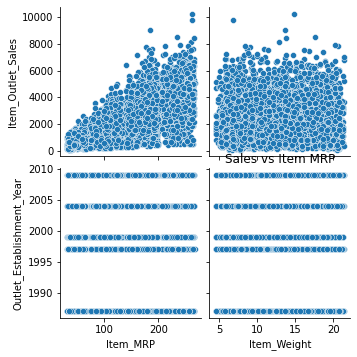

In [31]:
sns.pairplot(data=train, x_vars=["Item_MRP","Item_Weight"], y_vars=["Item_Outlet_Sales","Outlet_Establishment_Year"])
plt.title('Sales vs Item MRP')

plt.show()


*   products with a higher price (***Item_MRP***) would have a higher weight (***Item_Weight***) and that these two variables could be correlated.

*   Older stores that have been established for a longer time would have higher sales than newer stores.



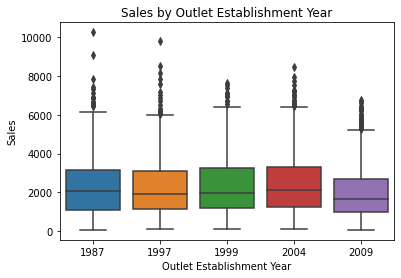

In [32]:
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train)

# Adding a title and labels
plt.title('Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')

plt.show()

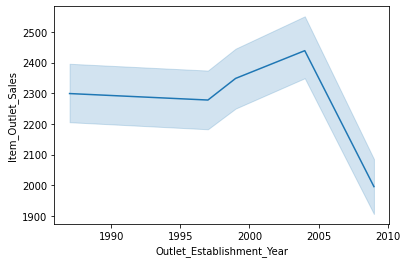

In [33]:
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train)
plt.show()


* the decreasing trend in the line plot and box plot could suggest that fewer stores were opened in years after 2004 compared to earlier years.
 However, it's also possible that this trend is due to other factors such as store closures or changes in the way the data was collected. 

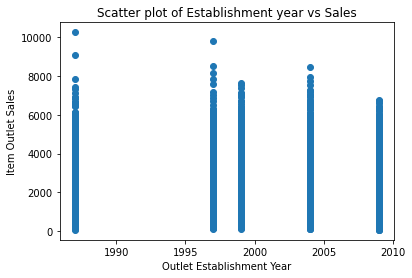

In [34]:
plt.scatter(train['Outlet_Establishment_Year'], train['Item_Outlet_Sales'])
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter plot of Establishment year vs Sales')
plt.show()

* We dont have any lines in 1990 upto 1996 and from 2000 to 2003 and then from 2004 to 2009. This might mean no new stores were opened within these time periods or no reports were made to show in plot


# **Checking outlires of trian dataset**

In [35]:
#checking outliers  
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
std,4.670973,0.044607,62.420534,7.388800,1497.964740
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025968,94.409400,1997.000000,1125.202000
50%,12.650000,0.049655,142.979900,1999.000000,1939.808300
75%,17.000000,0.088736,186.614150,2004.000000,3111.616300
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


for the column Item_Outlet_Sales we can see that the max value is 13086 while its mean is 2181, the mean is so small compared to the max value indicates the max value is an outlier.

In [36]:
#let do visualization for better view of outliers in Item_Outlet_Sales column
fig = px.histogram(train, x='Item_Outlet_Sales')

fig.show()

Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method called interquartile range (IQR) instead of using Z-score.

In [37]:
#create a function to find outliers using IQR

def find_outliers_IQR(train):

   q1=train.quantile(0.25)

   q3=train.quantile(0.75)

   IQR=q3-q1

   outliers = train[((train<(q1-1.5*IQR)) | (train>(q3+1.5*IQR)))]

   return outliers
  
#now let us use the above function to find out outliers

outliers = find_outliers_IQR(train['Item_Outlet_Sales'])

print('number of outliers: '+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 93
max outlier value: 10256.649
min outlier value: 6093.4016


After identifying the outliers, we need to deal with them. I have choose to drop the outlires. to do that i have created a function that replaces the outlier values with a NULL. Then i can use .dropna(), to drop the rows with NULL values. 

In [38]:
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped

drop_outliers_IQR(train['Item_Outlet_Sales'])

,index,Item_Outlet_Sales
0,43,6768.5228
1,55,6258.5200
2,145,7370.4060
3,146,6301.1312
4,276,7452.9652
...,...,...
88,8087,6199.9296
89,8113,6579.4356
90,8245,7549.5062
91,8350,7240.5750


In [39]:
#i will use .describe() to verify the min and max values have been dropped as expected

train.describe()['Item_Outlet_Sales']

count     4650.000000
mean      2272.037489
std       1497.964740
min         69.243200
25%       1125.202000
50%       1939.808300
75%       3111.616300
max      10256.649000
Name: Item_Outlet_Sales, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

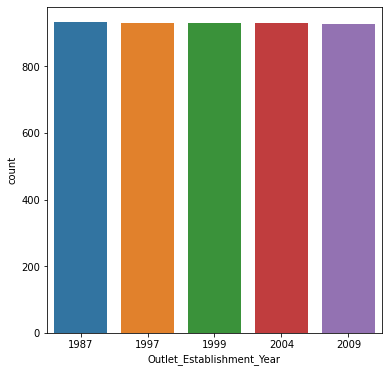

In [40]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

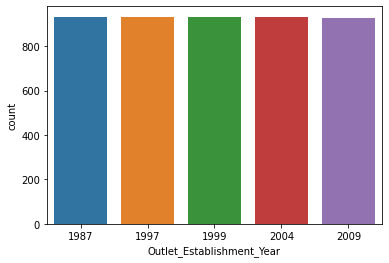

In [41]:
sns.countplot(x='Outlet_Establishment_Year',data=train)
plt.show

---

##Categorical into Numerical

In [42]:
train['Outlet_Establishment_Year'].max()

2009

In [43]:
train['Outlet_Establishment_Year'] = 2010-train['Outlet_Establishment_Year']
#to calculate the age of the store by subtracting the year it was established from 2020
#This is done to make the values of the column 'Outlet_Establishment_Year' more interpretable.

In [44]:
train.head()
#just to confirm if the dataset have been updated or not

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,11,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,1,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,11,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,23,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,1,Medium,Tier 3,Supermarket Type2,556.6088


In [45]:
train=train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
#drop 'Item_Identifier' and 'Outlet_Identifier' from the train dataset as they are not needed for further analysis.

In [46]:
train.shape
#checking the shape after dropping columns

(4650, 10)

In [47]:
dtrain = pd.get_dummies(train)
#to convert the categorical variables in the train dataset into numerical variables 
#---one-hot encoding---

In [48]:
dtrain.head()
#displaying first 5 rows after encoding is done

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,9.300,0.016047,249.8092,11,3735.1380,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,5.920,0.019278,48.2692,1,443.4228,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
2,17.500,0.016760,141.6180,11,2097.2700,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,8.930,0.000000,53.8614,23,994.7052,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
5,10.395,0.000000,51.4008,1,556.6088,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [49]:
y=dtrain['Item_Outlet_Sales']
#because item_outlet_sales is the target variable

In [50]:
x=dtrain.drop(['Item_Outlet_Sales'],axis=1)
xx=x.copy()
#dropped column item_outlet_Sales from dtrain dataset
#'axis=1' specifies that we want to drop a column and not a row.


In [51]:
stds=StandardScaler()
x = stds.fit_transform(x)
#x['Item_Weight']=stds.fit_transform(np.array(x['Item_Weight']).reshape(-1,1))

In [52]:
x=pd.DataFrame(x,columns=xx.columns)

preparing data for ML

In [53]:
XX_train,X_test,yy_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
X_train,X_cv,y_train,y_cv = train_test_split(XX_train,yy_train, test_size=0.2,random_state=42)

RandomForest regression

In [56]:
from sklearn.model_selection import RandomizedSearchCV


In [58]:
RF = RandomForestRegressor()
RF_est = {'n_estimators':range(10,1500,100),'max_depth':range(1,50)}
RF_model = RandomizedSearchCV(RF,RF_est,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
RF_model.fit(X_cv,y_cv) 


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': range(1, 50),
                                        'n_estimators': range(10, 1500, 100)},
                   scoring='neg_mean_squared_error')

In [59]:
print(RF_model.best_score_)
print(RF_model.best_estimator_)
print(RF_model.best_params_)

-1212378.8128890616
RandomForestRegressor(max_depth=8, n_estimators=1110)
{'n_estimators': 1110, 'max_depth': 8}


In [62]:
RF_Result = RandomForestRegressor(n_estimators=810,max_depth=8)
RF_Result.fit(X_train,y_train)
pred1 = RF_Result.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred1))

1052.0071606037075

Decision Tree

In [83]:
DTR = DecisionTreeRegressor(random_state=42)
DTR_cv = GridSearchCV(DTR,param_grid={'min_samples_split':range(2,20)},scoring='neg_mean_squared_error',cv=5)
DTR_cv.fit(X_cv,y_cv)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'min_samples_split': range(2, 20)},
             scoring='neg_mean_squared_error')

In [86]:
print(DTR_cv.best_score_)
print(DTR_cv.best_estimator_)
print(DTR_cv.best_params_)

-1747040.7489107237
DecisionTreeRegressor(min_samples_split=19, random_state=42)
{'min_samples_split': 19}


In [85]:
DTR_result = DecisionTreeRegressor(random_state=42,min_samples_split=19)
DTR_result.fit(X_train,y_train)
pred2 = DTR_result.predict(X_test)
np.sqrt(mean_squared_error(pred2,y_test))

1304.1121527345756

XGBoost

In [66]:
XG = XGBRegressor()
XG.fit(X_train,y_train)
pred3 = XG.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred3))

[01:17:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1042.9848592225596

In [67]:
X_train.shape

(2976, 33)

Stacking


In [88]:
from sklearn.tree import DecisionTreeRegressor


In [91]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
comb = StackingCVRegressor(regressors=(XG,RF,DTR), cv=5,meta_regressor=RF,random_state=42)
comb.fit(X_train,y_train)
X_test.columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32']
comb_pred = comb.predict(X_test)
np.sqrt(mean_squared_error(comb_pred,y_test))

TypeError: ignored

In [96]:
X_test.shape

(930, 33)

In [97]:
dtest.shape

NameError: ignored

##TO-DO
1.   Encoding Categorical Variables
2.   Label encoding
3.   One Hot Encoding
4.   PreProcessing Data
---
**Modeling**
1.  Linear Regression
2.  Regularized Linear Regression
3.  RandomForest
4.  XGBoost
